# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *

/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
categorical_features = ['date',
 'images_requester_roles',
 'images_study_types',
 'labos_requester_roles',
 'sectors_last_sector',
 'sectors_names',
 'surgeries_actual',
 'surgeries_anesthesia_types',
 'surgeries_bact_positive',
 'surgeries_injury_condition',
 'surgeries_post_surgery_condition',
 'surgeries_scheduled',
 'surgeries_scheduled_done',
 'surgeries_services',
 'surgeries_types',
 'gender',
 'insurance_entity',
 'entity_group',
 'origin',
 'admission_sector',
 'isolation',
 'presumptive_dianogsis',
 'responsible_sector',
 'ARM_TEP',
 'CEC_TEP',
 'request_origin',
 'request',
 'request_diagnosis',
 'request_sector',
 'admission_date']
numerical_features = ['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age']

In [5]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features}

In [6]:
rf_extra_features = Model(**model_params)
rf_extra_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


### Baseline

In [13]:
%%time
rf_extra_features.fit_classifier()

Training classifier
building tree 1 of 50
building tree 2 of 50


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.2s


building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.6s


building tree 13 of 50
building tree 14 of 50
building tree 15 of 50


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.0s


building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    1.5s


building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    2.0s


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.6s


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.3s


CPU times: user 6.44 s, sys: 267 ms, total: 6.71 s
Wall time: 3.85 s


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    3.6s finished


In [14]:
rf_extra_features.model_features

['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age',
 'date_2017_01_01',
 'date_2017_01_02',
 'date_2017_01_03',
 'date_2017_01_04',
 'date_2017_01_05',
 'date_2017_01_06',
 'date_2017_01_07',
 'date_2017_01_08',
 'date_2017_01_09',
 'date_2017_01_10',
 'date_2017_01_11',
 'date_2017_01_

In [16]:
rf_extra_features.n_features

28081

In [20]:
rf_extra_features.get_classifier_params()

{'n_estimators': 50,
 'random_state': 2020,
 'max_depth': 10,
 'max_features': 'sqrt',
 'verbose': 10,
 'n_jobs': 2}

In [15]:
rf_extra_features.get_performance_metrics()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks  

training AUC ROC score:  0.7765377097092718
validation AUC ROC score:  0.7708045389398963
relative over-fitting:  0.007382990803527057


In [7]:
rf_param_grid = {'max_depth': [7,10,15],
                  'max_features': ['sqrt','log2'],
                  'n_estimators': [100,150,200,300]}

In [8]:
rf_extra_features.optimize_hyperparams(params_dict=rf_param_grid,n_folds=3,search_type='grid')

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   42.7s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 12.3min
[Parallel(n_jobs=2)]: Done  54 out of  54 | elapsed: 14.1min finished


{'mean_fit_time': array([15.46575038, 21.61015749, 27.62326058,  6.85247127, 10.3010904 ,
        13.68615842, 20.42103513, 32.85793336, 49.38636398, 11.69809222,
        17.03249963, 25.32293669, 44.77936951, 56.13293235, 96.1535147 ,
        16.72831305, 23.42708969, 29.28199863]),
 'std_fit_time': array([0.30574887, 0.41999197, 0.41945392, 0.13788093, 0.0762945 ,
        0.29035953, 0.19456626, 1.26282339, 2.00084608, 0.74483362,
        1.45043284, 1.38536048, 5.00961272, 0.11419309, 8.91170655,
        0.34946068, 0.4505065 , 2.35027932]),
 'mean_score_time': array([1.30734142, 1.65562654, 2.16401601, 1.09882442, 1.71875358,
        2.16805998, 1.27674333, 1.99634202, 3.3006084 , 1.61623001,
        1.95760814, 3.33438428, 1.93349115, 2.47105328, 4.49930803,
        1.54717   , 2.40371227, 2.74196808]),
 'std_score_time': array([0.18267777, 0.04121079, 0.04365982, 0.00603487, 0.07660936,
        0.05567587, 0.04756835, 0.10017518, 0.08965729, 0.30430774,
        0.040761  , 0.5014

In [9]:
rf_results = rf_extra_features.get_model_selection_results()

In [10]:
rf_results.to_csv('experiments/extra_Features_model/rf_extra_features_grid_search_results.csv')

In [11]:
rf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.465750,0.305749,1.307341,0.182678,7,sqrt,100,0.754942,0.765338,0.736360,0.752213,0.011987,9
1,21.610157,0.419992,1.655627,0.041211,7,sqrt,150,0.758348,0.763376,0.745440,0.755721,0.007554,8
2,27.623261,0.419454,2.164016,0.043660,7,sqrt,200,0.758046,0.762072,0.747659,0.755926,0.006072,7
3,6.852471,0.137881,1.098824,0.006035,7,log2,100,0.732471,0.702887,0.684921,0.706759,0.019604,18
4,10.301090,0.076295,1.718754,0.076609,7,log2,150,0.754564,0.701874,0.703699,0.720046,0.024420,17
5,13.686158,0.290360,2.168060,0.055676,7,log2,200,0.749295,0.718211,0.714265,0.727257,0.015666,15
6,20.421035,0.194566,1.276743,0.047568,10,sqrt,100,0.768733,0.774656,0.749900,0.764429,0.010555,6
7,32.857933,1.262823,1.996342,0.100175,10,sqrt,150,0.768789,0.770840,0.754300,0.764643,0.007361,5
8,49.386364,2.000846,3.300608,0.089657,10,sqrt,200,0.768542,0.769610,0.756015,0.764723,0.006173,4
9,11.698092,0.744834,1.616230,0.304308,10,log2,100,0.738234,0.720684,0.702277,0.720398,0.014681,16


### Optimized

In [9]:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

In [12]:
rf_extra_features.model_selection.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}

In [7]:
%%time
rf_extra_features.fit_classifier(**{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150})

Training classifier


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s


building tree 5 of 150
building tree 6 of 150


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.6s


building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    1.6s


building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.2s


building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    3.2s


building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    4.2s


building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    5.2s


building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.4s


building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    7.8s


building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    9.5s


building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   11.4s


building tree 83 of 150
building tree 84 of 150
building tree 85 of 150
building tree 86 of 150
building tree 87 of 150
building tree 88 of 150
building tree 89 of 150
building tree 90 of 150
building tree 91 of 150
building tree 92 of 150
building tree 93 of 150
building tree 94 of 150
building tree 95 of 150
building tree 96 of 150


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   13.2s


building tree 97 of 150
building tree 98 of 150
building tree 99 of 150
building tree 100 of 150
building tree 101 of 150
building tree 102 of 150
building tree 103 of 150
building tree 104 of 150
building tree 105 of 150
building tree 106 of 150
building tree 107 of 150
building tree 108 of 150
building tree 109 of 150
building tree 110 of 150
building tree 111 of 150
building tree 112 of 150


[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   15.8s


building tree 113 of 150
building tree 114 of 150
building tree 115 of 150
building tree 116 of 150
building tree 117 of 150
building tree 118 of 150
building tree 119 of 150
building tree 120 of 150
building tree 121 of 150
building tree 122 of 150
building tree 123 of 150
building tree 124 of 150
building tree 125 of 150
building tree 126 of 150


[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   18.3s


building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150


[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   21.3s


building tree 144 of 150
building tree 145 of 150
building tree 146 of 150
building tree 147 of 150
building tree 148 of 150
building tree 149 of 150
building tree 150 of 150
CPU times: user 42.1 s, sys: 737 ms, total: 42.9 s
Wall time: 22.9 s


[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:   22.6s finished


In [8]:
len(rf_extra_features.model_features)

28081

In [9]:
rf_extra_features.get_performance_metrics()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    4.4s
[Para

training AUC ROC score:  0.7990170841944685
validation AUC ROC score:  0.78533549591145
relative over-fitting:  0.01712302346677806


[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    0.5s finished


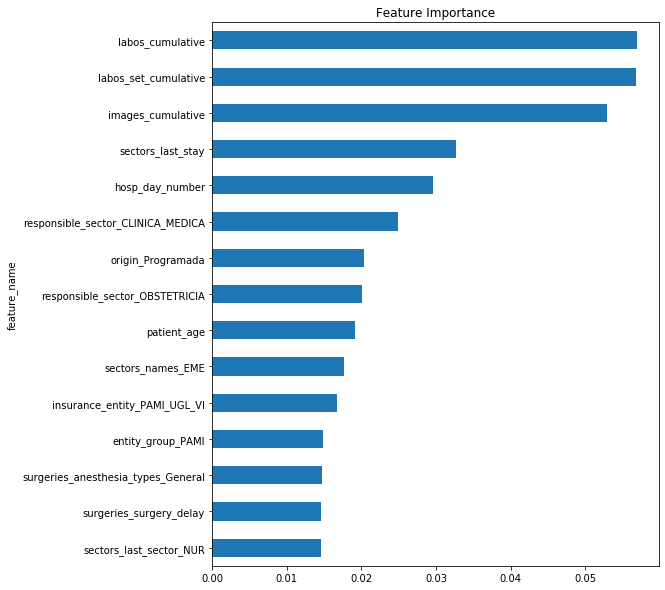

In [10]:
rf_extra_features.plot_feature_importance(15)